## Regression Analysis with Python's sklearn
Updated: June 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

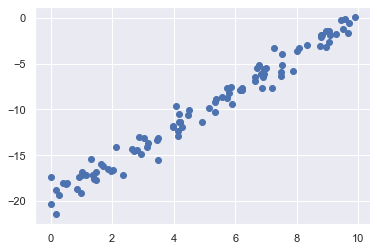

In [2]:
# Generate random values as a linear function with some noise
#
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = 2 * x - 20 + rng.randn(100)
plt.scatter(x, y)

In [3]:
# Perform linear regression analysis using sklearn
#
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)  # with Y-intercept

# change to 2D array, required by the model.fit() (n_samples, n_features)
X = x[:, np.newaxis]

print('Before x:', type(x), x.shape)
print('After  X:', type(X), X.shape)

# Fit (or train) the model
b = model.fit(X, y)

Before x: <class 'numpy.ndarray'> (100,)
After  X: <class 'numpy.ndarray'> (100, 1)


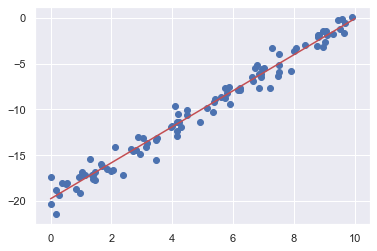

Slope: [1.96849251]
Intercept: -19.763042745851088


In [4]:
# Draw the linear regression line on the chart
#
xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit,'r');
plt.show()

print('Slope:', model.coef_)
print('Intercept:', model.intercept_)

In [5]:
# model evaluation
#
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y, yfit)
r2 = r2_score(y, yfit)

print('RMSE:     ', rmse)  # Root mean squared error
print('R2 score: ', r2)

RMSE:      56.40657644271775
R2 score:  -0.6404439133160325


## Multiple linear regression with the Boston Housing dataset

### Boston House Dataset Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets   # https://scikit-learn.org/stable/datasets/toy_dataset.html
boston = datasets.load_boston()

print(boston.feature_names)
target = pd.DataFrame(boston.target, columns=['MEDV'])
print(type(target), target)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'pandas.core.frame.DataFrame'>      MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [7]:
# define the data/predictors as the pre-set feature names
# and add the target 'MEDV' into the dataframe as the 1st column
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df = target.join(df)
df

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
df.corr().round(4)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.0000,-0.3883,0.3604,-0.4837,0.1753,-0.4273,0.6954,-0.3770,0.2499,-0.3816,-0.4685,-0.5078,0.3335,-0.7377
CRIM,-0.3883,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556
ZN,0.3604,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
INDUS,-0.4837,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
CHAS,0.1753,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539
NOX,-0.4273,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909
RM,0.6954,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138
AGE,-0.3770,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023
DIS,0.2499,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970
RAD,-0.3816,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887


Text(0.5, 1.0, 'Correlation Heatmap')

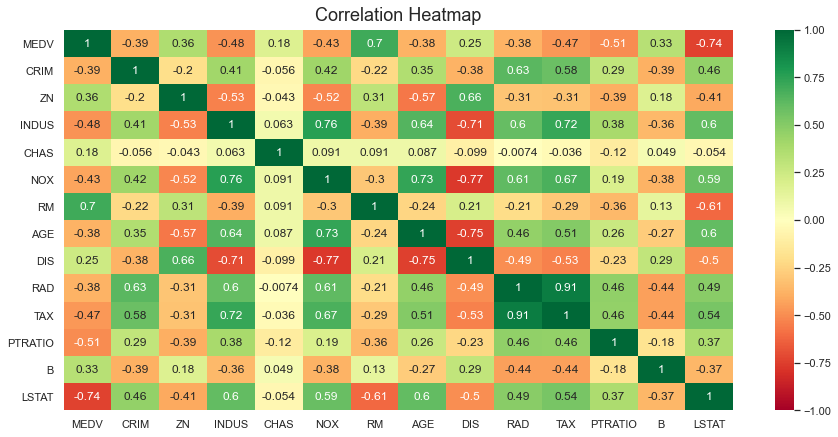

In [9]:
plt.figure(figsize=(15, 7))

# set the range of values to be displayed on the colormap from -1 to 1.
# and set the annotation to True to display the correlation values on the heatmap.
hm = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')

hm.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=9)

By using correlation coefficient, we choose two variables: RM — the average number of rooms and LSTAT — percentage of lower status of the population, to predict values of MEDV.

Let's first use statmodels's OLS model. OLS stands for "Ordinary Least Squares", and 'Least Squares' means using a regression line that would minimize the square of distance from the regression line. It’s important to note that <font color='red'>Statsmodels does not add a constant by default</font>. Let’s see it first without a constant in our regression model:

## 1. Use RM and LSTAT only, without a constant

In [10]:
import statsmodels.api as sm

X = df[['RM', 'LSTAT']] ## Without a constant
y = target['MEDV']

# create stat's Ordinary Least Squares model
model = sm.OLS(y, X).fit()

# make the predictions with the model
predictions = model.predict(X)

# display the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                        0.00
Time:                        16:32:24   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**<font color='red'>Df</font>** stands for <font color='red'>degrees of freedom</font> - the number of values in the final calculation of a statistic that are free to vary.

## 2. Use RM and LSTAT with a constant (y-intercept)

In [11]:
X = df[['RM', 'LSTAT']]   # Now use both RM and LSTAT as predictors
X = sm.add_constant(X)    # Also, add an intercept (B0) to our model
y = target['MEDV']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary(), '\n')
print(predictions[:5].round(3))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          7.01e-112
Time:                        16:32:24   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

In [12]:
from sklearn import linear_model
from sklearn import datasets

data = datasets.load_boston()
df   = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [13]:
lm = linear_model.LinearRegression(fit_intercept=True)  # default is True

results = lm.fit(X, y)  # fit the model to the training data

In [14]:
predictions = lm.predict(X) # predict to see accuracy or the training data

print(predictions[0:18])   # see only the first 18 predicted values

[28.94101368 25.48420566 32.65907477 32.40652    31.63040699 28.05452701
 21.28707846 17.78559653  8.10469338 18.24650673 17.99496223 20.73221309
 18.5534842  23.64474107 23.10895823 22.9239452  24.65257604 19.73611045]


In [15]:
R2 = lm.score(X,y)
print('R square:', R2)
print('Slope:', results.coef_)
print('Intercept:', results.intercept_)
print('No. of predictor(s):', results.n_features_in_)

R square: 0.6385616062603403
Slope: [ 0.          5.09478798 -0.64235833]
Intercept: -1.3582728118744853
No. of predictor(s): 3


## Now, try running again without a constant (y-intercept)

In [16]:
lm = linear_model.LinearRegression(fit_intercept=False)  # default is True
model = lm.fit(X, y)

In [17]:
predictions = lm.predict(X)
print(predictions[0:18])   # just see only the first 18 predicted values

[28.94101368 25.48420566 32.65907477 32.40652    31.63040699 28.05452701
 21.28707846 17.78559653  8.10469338 18.24650673 17.99496223 20.73221309
 18.5534842  23.64474107 23.10895823 22.9239452  24.65257604 19.73611045]


In [18]:
R2 = lm.score(X,y)
print('R square:', R2)
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)
print('No. of predictor(s):', model.n_features_in_)

R square: 0.6385616062603403
Slope: [-1.35827281  5.09478798 -0.64235833]
Intercept: 0.0
No. of predictor(s): 3


### What are the model's R square, coefficient and intercept values?

## Limitations of Linear Regression Model
1. Linearity
2. Outliner
3. Interdependence of variables

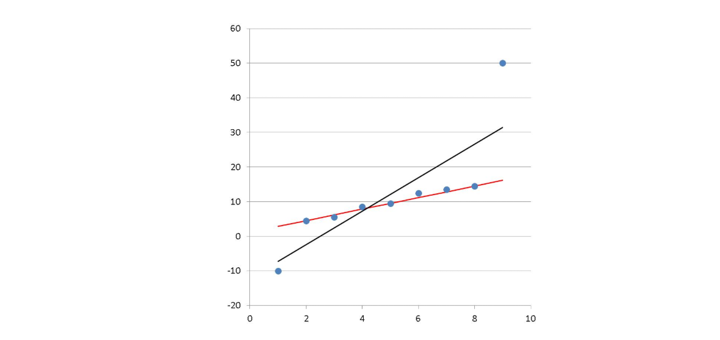

## Polynomial Regression

In [19]:
# Polynomial Regression
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
#
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = np.linspace(-10, 7, 30)
y = (0.4 * x**3) + 5 * (x**2) - x + np.random.normal(-40, 40, 30)
#x = 2 - 3 * np.random.normal(0, 1, 20)
#y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transform the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [20]:
# Generate a new feature matrix consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree.
#
features = PolynomialFeatures(degree=2)
x_poly   = features.fit_transform(x)

# Do the regression modeling and make the prediction
#
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

RMSE = 61.325185386369434
R2 = 0.6744763134609137


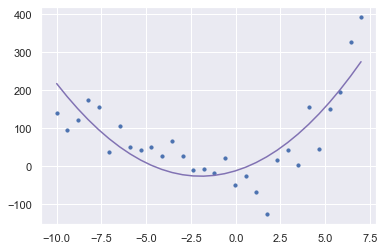

In [21]:
# View the result and metrics
#
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2   = r2_score(y,y_poly_pred)
print('RMSE =', rmse)
print('R2 =', r2)

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis  = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [29]:
# Generate a new feature matrix consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
#
features = PolynomialFeatures(degree=3)
x_poly   = features.fit_transform(x)

In [30]:
# Do the regression modeling and make the prediction
#
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

RMSE = 39.79425460213335
R2 = 0.8629289927465575


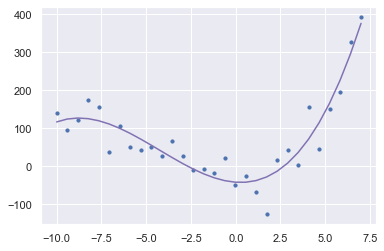

In [23]:
# View the result and metrics
#
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2   = r2_score(y,y_poly_pred)
print('RMSE =', rmse)
print('R2 =', r2)

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis  = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [24]:
# Generate a new feature matrix consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree.
features = PolynomialFeatures(degree=4)
x_poly   = features.fit_transform(x)

# Do the regression modeling and make the prediction
#
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

RMSE = 38.813421093582704
R2 = 0.8696026685450101


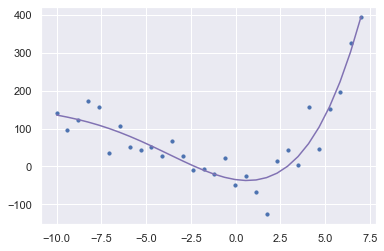

In [25]:
# View the result and metrics
#
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2   = r2_score(y,y_poly_pred)
print('RMSE =', rmse)
print('R2 =', r2)

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis  = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [26]:
# Generate a new feature matrix consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree.
features = PolynomialFeatures(degree=15)
x_poly   = features.fit_transform(x)

# Do the regression modeling and make the prediction
#
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

RMSE = 31.02820145763909
R2 = 0.9166667996701975


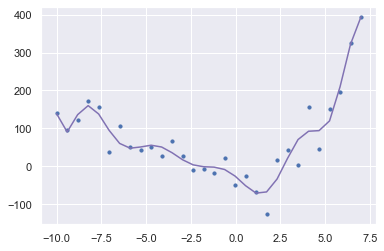

In [27]:
# View the result and metrics
#
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2   = r2_score(y,y_poly_pred)
print('RMSE =', rmse)
print('R2 =', r2)

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis  = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### This is the end of this Python notebook